<a href="https://colab.research.google.com/github/ricospeloacaso/python_para_investimentos/blob/master/11_13_Acessando_Dados_do_Investing_com_Python_para_Investimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso

Link para o vídeo: https://youtu.be/JmpZQAIDboo

###Bibliotecas

In [0]:
!pip install investpy

In [0]:
import investpy as inv

In [0]:
import plotly.graph_objects as go

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Fundos de Investimento

In [0]:
fundos_br = inv.get_funds_list(country='brazil')
fundos_br

In [0]:
len(fundos_br)

5200

In [0]:
fundos_br[:5]

['Fundo De Investimento Multimercado Bordeaux Iv Crédito Privado Investimento No Exterior',
 'Cshg Warrior V Fundo De Investimento Multimercado - Crédito Privado Investimento No Exterior',
 'A3 Viking Fi Em Quotas De Fi Multimercado Crédito Privado Investimento No Exterior',
 'Bb Espelho Multimercado Lp J. Safra Absoluto 30 Private Fic Fi',
 'Ctm Hedge Fundo De Investimento Multimercado - Longo Prazo']

In [0]:
pesq = inv.search_funds(by='name', value='alaska black')
pesq

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,brazil,Alaska Black Fundo De Investimento Em Cotas De...,0P0000U9BK,Alaska Investimentos LTDA.,BRSKP7CTF008,other,BRL,NaN
1,brazil,Alaska Black Master Fundo De Investimento Em A...,0P0000U9BJ,Alaska Investimentos LTDA.,BRSKI1CTF000,other,BRL,NaN
2,brazil,Alaska Black Fundo De Investimento Em Cotas De...,0P00019LLR,Alaska Investimentos LTDA.,BRALK5CTF006,equity,BRL,NaN
3,brazil,Alaska Black Institucional Fundo De Investimen...,0P00019X6E,Alaska Investimentos LTDA.,BRASK4CTF002,equity,BRL,NaN
4,brazil,Alfa Alaska Black Institucional - Fundo De Inv...,0P0001CF6A,Banco Alfa Investimentos SA,BRLSK1CTF005,equity,BRL,NaN


In [0]:
pesq['name'][0]

'Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações - Bdr Nível I'

In [0]:
fundo = 'Alaska Black Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações - Bdr Nível I'
alaska = inv.get_fund_historical_data(fundo, country='brazil', from_date='01/01/1900', to_date='26/04/2020')['Close']
alaska

Date
2011-01-25    0.999
2011-01-26    0.991
2011-01-27    0.977
2011-01-28    0.956
2011-01-31    0.953
              ...  
2020-04-16    1.720
2020-04-17    1.729
2020-04-20    1.773
2020-04-22    1.816
2020-04-23    1.793
Name: Close, Length: 2317, dtype: float64

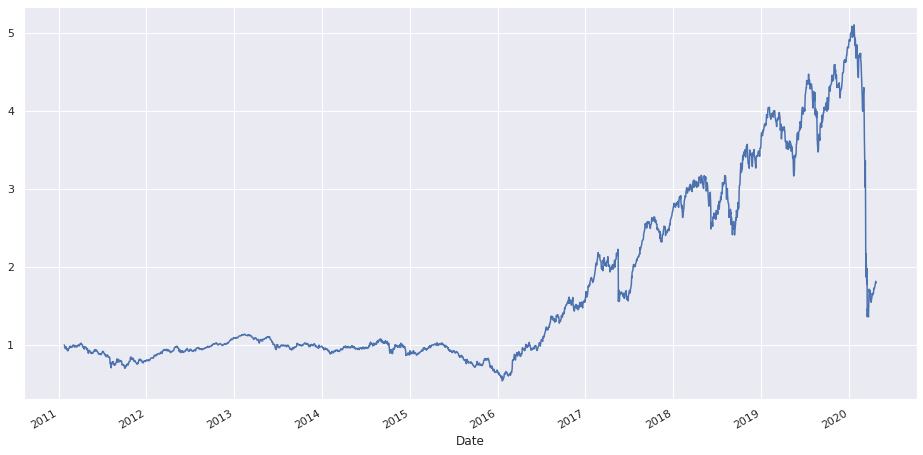

In [0]:
alaska.plot();

In [0]:
pesq2 = inv.search_funds(by='name', value='ip parti')
pesq2

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,brazil,Ip Participações Master Fundo De Investimento ...,0P0000U6BB,Investidor Profissional Gestão de Recursos Ltda,BRIPP5CTF009,equity,BRL,NaN
1,brazil,Ip Participações Ipg Fundo De Investimento Em ...,0P0000U6PB,Investidor Profissional Gestão de Recursos Ltda,BRORM2CTF009,equity,BRL,NaN
2,brazil,Ip Participações Fundo De Investimento Em Cota...,0P0000U6B9,Investidor Profissional Gestão de Recursos Ltda,BRIPPTCTF007,equity,BRL,NaN


In [0]:
pesq2['name'][1]

'Ip Participações Ipg Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações Bdr Nível I'

In [0]:
fundo = 'Ip Participações Ipg Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações Bdr Nível I'
ip = inv.get_fund_historical_data(fundo, country='brazil', from_date='01/01/1900', to_date='26/04/2020')['Close']
ip

Date
2017-06-29    2.277
2017-06-30    2.293
2017-07-03    2.292
2017-07-04    2.291
2017-07-05    2.294
              ...  
2020-04-16    3.002
2020-04-17    3.051
2020-04-20    3.075
2020-04-22    3.113
2020-04-23    3.107
Name: Close, Length: 699, dtype: float64

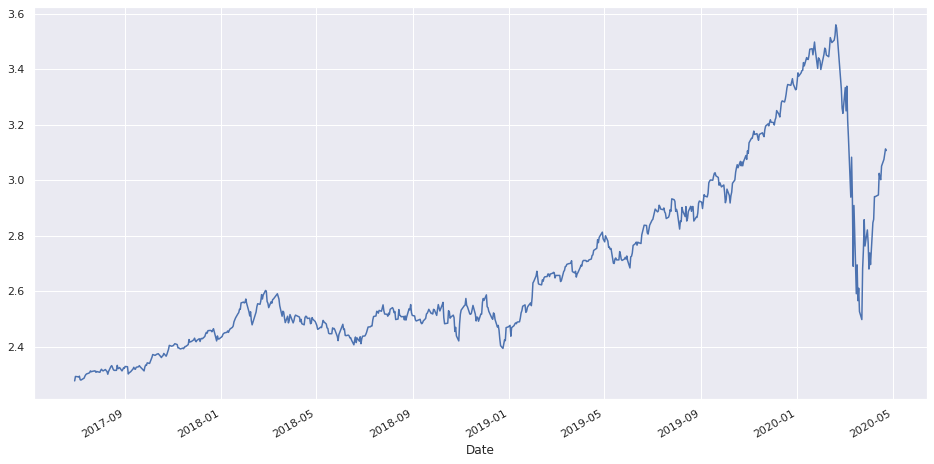

In [0]:
ip.plot();

In [0]:
inv.get_etfs_overview(country='brazil')

,country,name,full_name,symbol,last,change,turnover,currency
0,brazil,Ishares Ibovespa,Ishares Ibovespa,BOVA11,72.41,-5.53%,45900000,BRL
1,brazil,It Now Ibovespa Fundo De Indice,It Now Ibovespa Fundo De Indice,BOVV11,75.69,-5.39%,2810000,BRL
2,brazil,iShares BM&FBOVESPA Small Cap,iShares BM&FBOVESPA Small Cap,SMAL11,83.99,-7.20%,2730000,BRL
3,brazil,Fundo de Invest Ishares SP 500,Fundo de Investimento Ishares S&P 500,IVVB11,172.65,+3.68%,987310,BRL
4,brazil,It Now PIBB IBrX-50,It Now PIBB IBrX-50,PIBB11,125.47,-5.69%,972330,BRL
5,brazil,It Now IDIV,It Now IDIV,DIVO11,47.60,-4.90%,820440,BRL
6,brazil,ETF Bradesco Ibovespa Fdo De Indice,ETF Bradesco Ibovespa Fundo de Índice,BOVB11,75.39,-5.44%,733370,BRL
7,brazil,It Now SP500 TRN,It Now S&P500 TRN,SPXI11,168.59,+3.62%,226610,BRL
8,brazil,It Now Small Cap Fundo de indice,It Now Small Cap Fundo de Índice,SMAC11,43.65,-8.09%,149070,BRL
9,brazil,XP MALLS FDO INV IMOB FII,XP MALLS FDO INV IMOB FII,XPML11,94.30,-3.93%,74740,BRL


In [0]:
bova11 = inv.get_etf_historical_data('Ishares Ibovespa', country='brazil', from_date='01/01/1900', to_date='25/04/2020')['Close']
bova11

Date
2008-12-03    35.31
2008-12-04    35.70
2008-12-05    35.35
2008-12-08    38.46
2008-12-09    37.54
              ...  
2020-04-17    76.00
2020-04-20    75.66
2020-04-22    77.70
2020-04-23    76.65
2020-04-24    72.41
Name: Close, Length: 2814, dtype: float64

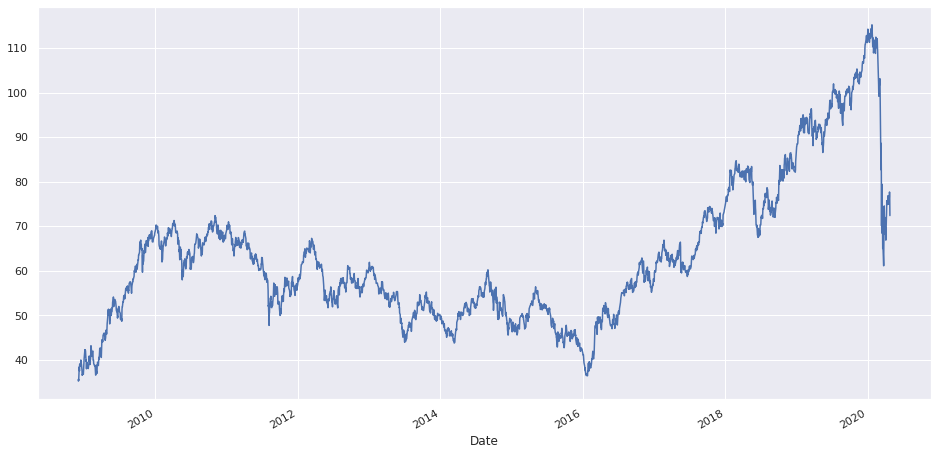

In [0]:
bova11.plot();

>Alaska x IP x BOVA11

In [0]:
comparativo = pd.DataFrame()
data_inicio = ip.index[0]

comparativo['ip'] = ip / ip.loc[data_inicio]
comparativo['alaska'] = alaska / alaska.loc[data_inicio]
comparativo['bova11'] = bova11 / bova11.loc[data_inicio]

comparativo

,ip,alaska,bova11
Date,,,
2017-06-29,1.000000,1.000000,1.000000
2017-06-30,1.007027,1.017791,1.013810
2017-07-03,1.006588,1.042945,1.016473
2017-07-04,1.006148,1.028834,1.017471
2017-07-05,1.007466,1.022699,1.015807
...,...,...,...
2020-04-16,1.318401,1.055215,1.246755
2020-04-17,1.339921,1.060736,1.264559
2020-04-20,1.350461,1.087730,1.258902


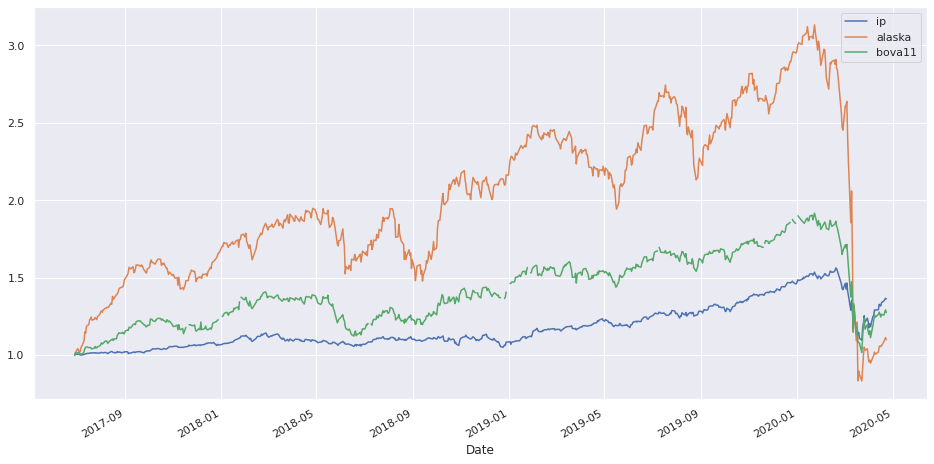

In [0]:
comparativo.plot();

###Índices

In [0]:
inv.get_indices_list('brazil')

['MSCI Brazil Net USD',
 'DJ Brazil',
 'TR Brazil 50',
 'MSCI Brazil Price USD',
 'DJ Brazil Titans 20 ADR',
 'BNY Mellon Brazil ADR',
 'BNY Mellon Brazil ADR TR',
 'BNY Mellon Brazil Classic ADR',
 'BNY Mellon Brazil Classic ADR TR',
 'FTSE RAFI Brazil 50',
 'MSCI Brazil 10 40',
 'DJ BRIC Brazil 15 Capped NTR',
 'DJ BRIC Brazil 15 USD',
 'DJ BRIC Brazil 15 EUR',
 'FTSE Brazil Infrastructure Extended',
 'MSCI Brazil Gross',
 'DJ Brazil Titans 20 ADR TR',
 'MSCI Brazil 25-50 Price',
 'MSCI Brazil 20-50 Gross Return',
 'MSCI Brazil 25-50 Net Return',
 'FTSE Brazil Infrastructure Extended USD PR',
 'FTSE Brazil Infrastructure Extended Total Return',
 'FTSE Brazil Infrastructure Extended Net Tax Total',
 'FTSE Brazil Infrastructure Extended Net Tax USD TR',
 'DJ BRIC Brazil 15 DR',
 'MSCI Brazil',
 'BM&FBOVESPA Unsponsored BDRX',
 'Small Cap Index',
 'Tag Along',
 'Brazil broad-Based',
 'Brazil Index',
 'Mid-Large Cap Index',
 'Public Utilities',
 'BM&FBOVESPA Real Estate IFIX',
 'Financia

In [0]:
inv.get_index_recent_data('Bovespa', country='brazil')

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-03-27,77707.88,77707.88,73057.12,73428.78,10301442,BRL
2020-03-30,73430.65,75429.74,73184.22,74639.48,9032163,BRL
2020-03-31,74629.42,75511.03,72385.14,73019.76,11141469,BRL
2020-04-01,73010.78,73010.78,69568.56,70966.70,10093470,BRL
2020-04-02,70968.53,73861.00,70956.84,72253.46,10540157,BRL
2020-04-03,72241.09,72241.09,67802.47,69537.56,10411316,BRL
2020-04-06,69555.61,75259.70,69555.61,74072.98,9685375,BRL
2020-04-07,74078.01,79855.48,74078.01,76358.09,11286506,BRL
2020-04-08,76334.79,79058.13,76115.19,78624.62,10206330,BRL


In [0]:
ibov = inv.get_index_historical_data('Bovespa', country='brazil', from_date='01/01/1900', to_date='26/04/2020')
ibov

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-12-27,14804.50,15222.92,14804.50,15186.15,239975392,BRL
2000-12-28,15188.21,15269.30,15132.06,15259.29,324256128,BRL
2001-01-02,15242.11,15621.41,15173.61,15425.34,230631104,BRL
2001-01-03,15425.41,16599.42,15251.12,16599.42,381195200,BRL
2001-01-04,16596.78,16933.39,16586.85,16675.06,331230784,BRL
...,...,...,...,...,...,...
2020-04-17,77817.46,79846.43,77754.45,78990.29,8317760,BRL
2020-04-20,78988.64,80105.99,76942.89,78972.76,8874705,BRL
2020-04-22,78972.83,81183.73,78972.76,80687.15,9848913,BRL


In [0]:
ibov_dolarizado = inv.get_index_historical_data('Ibovespa USD', country='brazil', from_date='01/01/1900', to_date='26/04/2020')
ibov_dolarizado

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2018-02-19,26107.97,26268.69,26107.97,26201.34,2153492,BRL
2018-02-20,26218.10,26550.05,25925.54,26317.45,4204220,BRL
2018-02-21,26400.40,26839.02,26361.47,26368.51,4964374,BRL
2018-02-22,26437.20,26742.46,26402.32,26588.26,3645050,BRL
2018-02-23,26598.55,26902.36,26576.62,26860.11,4307772,BRL
...,...,...,...,...,...,...
2020-04-17,14861.15,15248.64,14849.12,15085.13,8317760,BRL
2020-04-20,14856.42,15066.58,14471.65,14853.44,8874705,BRL
2020-04-22,14873.83,15078.42,14667.77,14784.36,9848913,BRL


In [0]:
ifix = inv.get_index_historical_data('BM&FBOVESPA Real Estate IFIX', country='brazil', from_date='01/01/1900', to_date='26/04/2020')
ifix

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2013-01-10,1587.96,1590.77,1584.30,1589.87,0,BRL
2013-01-11,1589.87,1590.03,1583.66,1587.21,0,BRL
2013-01-14,1587.22,1588.46,1582.70,1584.45,0,BRL
2013-01-15,1584.96,1587.13,1581.59,1583.76,0,BRL
2013-01-16,1583.76,1584.76,1578.58,1583.12,0,BRL
...,...,...,...,...,...,...
2020-04-17,2550.18,2571.20,2550.18,2559.48,0,BRL
2020-04-20,2559.47,2563.27,2551.47,2555.55,0,BRL
2020-04-22,2555.55,2577.55,2555.55,2573.06,0,BRL


In [0]:
indices = pd.DataFrame()
data_inicio = ifix.index[0]

indices['ifix'] = ifix['Close'] / ifix['Close'].loc[data_inicio]
indices['ibov'] = ibov['Close'] / ibov['Close'].loc[data_inicio]

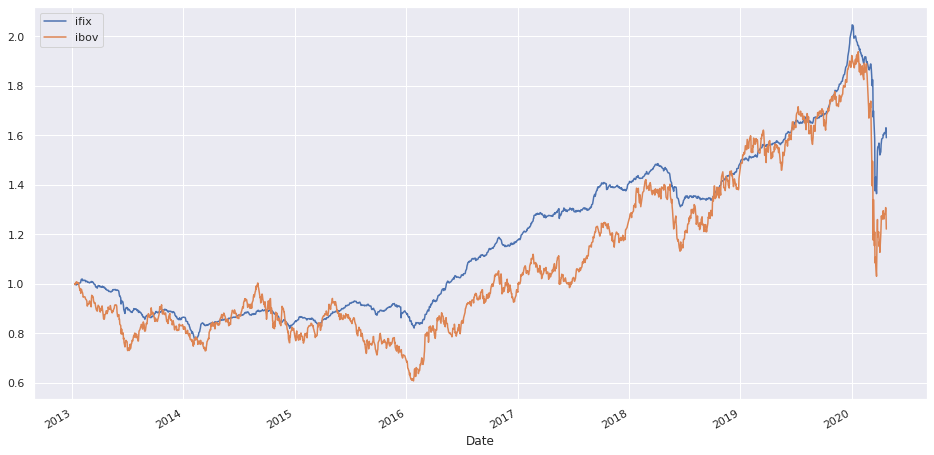

In [0]:
indices.plot();

###Ações



In [0]:
inv.get_stocks('brazil')

,country,name,full_name,isin,currency,symbol
0,brazil,ABC BRASIL PN,Banco ABC Brasil SA,BRABCBACNPR4,BRL,ABCB4
1,brazil,BRASILAGRO ON,BrasilAgro - Co ON NM,BRAGROACNOR7,BRL,AGRO3
2,brazil,RUMO ON NM,RUMO Logistica Operadora Multimodal SA,BRRAILACNOR9,BRL,RAIL3
3,brazil,ALPARGATAS ON,Alpargatas SA,BRALPAACNOR0,BRL,ALPA3
4,brazil,ALPARGATAS PN,Alpargatas SA,BRALPAACNPR7,BRL,ALPA4
...,...,...,...,...,...,...
744,brazil,Integral Brei Reit,Fdo Inv Imob Fof Integral Brei Reit,BRIBFFCTF007,BRL,IBFF11
745,brazil,Vbi Cri,Fi Imobiliario Vbi Cri,BRCVBICTF001,BRL,CVBI11
746,brazil,Hedge Realty,Hedge Realty Devl Fdo Inv Imob Etf,BRHRDFCTF000,BRL,HRDF11
747,brazil,Rb Cap,Rb Cap Desenvolvimento Res Iii Fii,BRRSPDCTF006,BRL,RSPD11


In [0]:
inv.get_stock_company_profile('bbdc4', country='brazil')

{'desc': 'Banco Bradesco S.A. is a commercial bank. The Bank offers a range of banking and financial products and services in Brazil and abroad to individuals, large, mid-sized and small companies, and local and international corporations and institutions. Its segments include Financial; Insurance and Capitalization bonds; Pension plans, and Other Activities. The Financial segment consists of financial institutions and holding companies, which are responsible for managing financial resources, and credit card, consortium and asset management companies. The Insurance Group segment comprises insurance, pension plan and capitalization bond companies. It offers banking services, including deposit-taking activities, individual and corporate banking services, credit and debit cards, leasing operations, investment banking, asset management, consortium services and others. Its insurance services include health insurance, life and personal accident insurance, automobile, casualty and pension pla

In [0]:
bradesco = inv.get_stock_historical_data('bbdc4', country='brazil',  from_date='01/01/1900', to_date='25/04/2020')

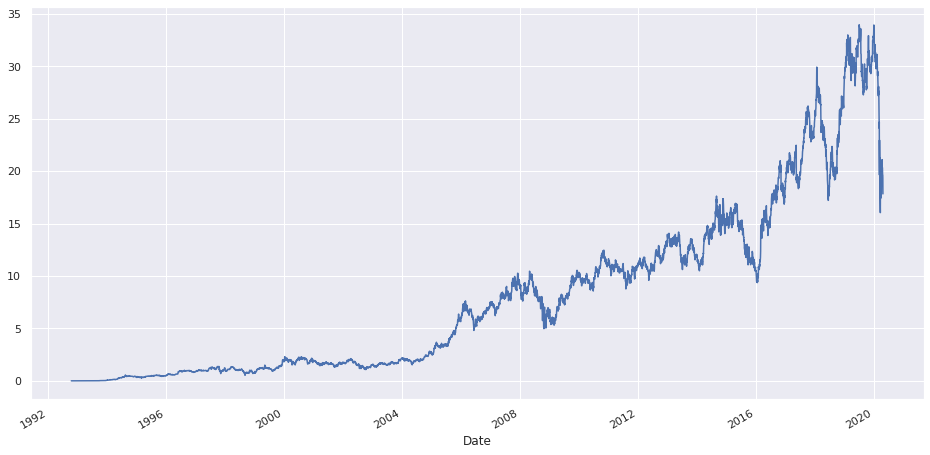

In [0]:
bradesco['Close'].plot();

In [0]:
inv.get_stock_information('bbdc4', country='brazil')

,Stock Symbol,Prev. Close,Todays Range,Revenue,Open,52 wk Range,EPS,Volume,Market Cap,Dividend (Yield),Average Vol. (3m),P/E Ratio,Beta,1-Year Change,Shares Outstanding,Next Earnings Date
0,BBDC4,17.84,17.84 - 18.86,1.267100e+11,17.84,15.71 - 34.43,2.72,10258200.0,2.611900e+11,0.99 (5.64%),36506812.0,12.19,1.51,- 42.08%,8.032297e+09,30/04/2020


In [0]:
inv.technical_indicators('bbdc4', country='brazil', product_type='stock')

,technical_indicator,value,signal
0,RSI(14),42.2520,sell
1,"STOCH(9,6)",42.5580,sell
2,STOCHRSI(14),38.8060,sell
3,"MACD(12,26)",-1.0000,sell
4,ADX(14),31.8910,sell
5,Williams %R,-68.5190,sell
6,CCI(14),-130.4498,sell
7,ATR(14),1.1593,less_volatility
8,Highs/Lows(14),-0.7295,sell
9,Ultimate Oscillator,41.3580,sell


In [0]:
inv.moving_averages('bbdc4', country='brazil', product_type='stock')

,period,sma_value,sma_signal,ema_value,ema_signal
0,5,19.05,sell,19.03,sell
1,10,19.81,sell,19.27,sell
2,20,19.44,sell,19.85,sell
3,50,22.56,sell,22.24,sell
4,100,26.88,sell,24.95,sell
5,200,28.45,sell,26.92,sell


### Curva de Juros

In [0]:
bondsBR = inv.get_bonds_list('brazil')

In [0]:
bondsBR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [0]:
bonds_overview  = inv.get_bonds_overview('brazil')

In [0]:
bonds_overview

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,3.285,3.290,3.290,3.290,0.000,0.00%
1,brazil,Brazil 6M,3.170,3.170,3.175,3.175,0.000,0.00%
2,brazil,Brazil 9M,3.338,3.345,3.345,3.345,0.000,0.00%
3,brazil,Brazil 1Y,3.568,3.585,3.585,3.585,-0.017,-0.47%
4,brazil,Brazil 2Y,3.768,3.775,3.768,3.768,+0.000,+0.00%
5,brazil,Brazil 3Y,5.099,5.130,5.099,5.099,0.000,0.00%
6,brazil,Brazil 5Y,7.464,6.180,7.490,7.490,+1.284,+20.78%
7,brazil,Brazil 8Y,8.338,6.990,8.365,8.365,+1.347,+19.28%
8,brazil,Brazil 10Y,8.509,7.275,8.545,8.545,+1.234,+16.96%


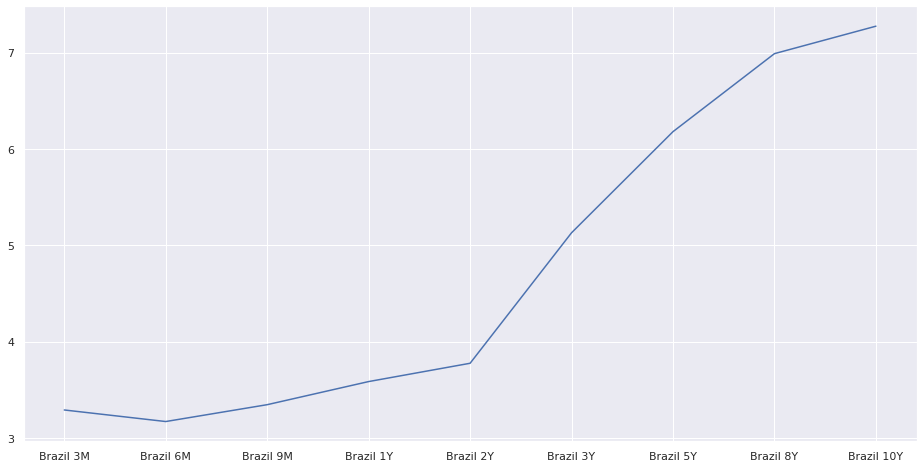

In [0]:
plt.plot(bondsBR, bonds_overview['last_close']);

In [0]:
data_inicio = '01/01/2010'
data_fim = '28/04/2020'

um_ano = inv.get_bond_historical_data('Brazil 1Y', from_date=data_inicio, to_date=data_fim)
um_ano

,Open,High,Low,Close
Date,,,,
2010-01-04,11.040,11.416,11.010,11.360
2010-01-05,11.370,11.400,11.310,11.320
2010-01-06,11.350,11.350,11.270,11.295
2010-01-07,11.275,11.416,11.270,11.416
2010-01-08,11.285,11.416,11.205,11.205
...,...,...,...,...
2020-04-20,3.225,3.225,2.920,2.920
2020-04-22,2.960,2.960,2.761,2.800
2020-04-23,2.800,2.980,2.800,2.973


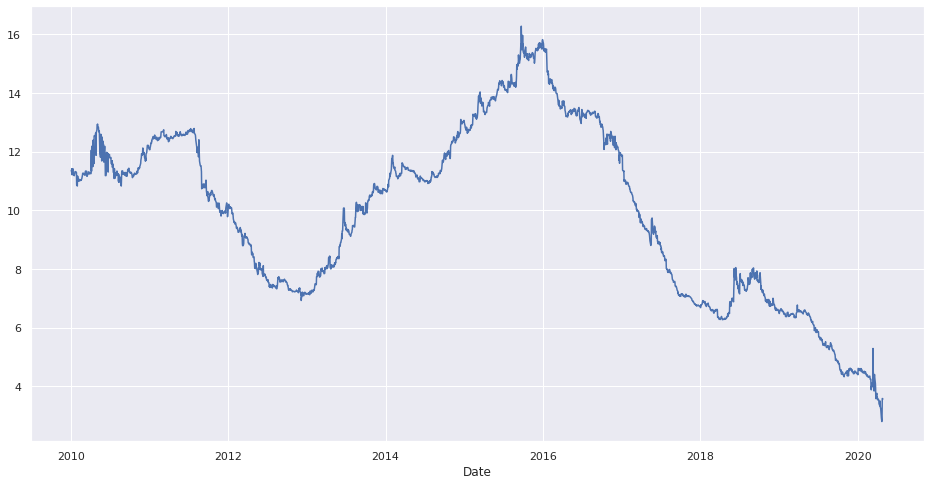

In [0]:
um_ano['Close'].plot();

In [0]:
data_inicio = '01/01/2010'
data_fim = '28/04/2020'
bonds = pd.DataFrame()

for prazo in bondsBR:
  bonds[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim)['Close']


In [0]:
bonds.index = pd.to_datetime(bonds.index)

In [0]:
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.700,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.740,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.750,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.770,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.760,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-04-17,3.320,3.135,3.130,3.220,4.005,5.160,6.010,6.705,7.030
2020-04-20,3.213,2.925,2.872,2.920,3.632,4.885,5.824,6.595,6.912
2020-04-22,3.068,2.773,2.710,2.800,3.525,4.788,5.754,6.577,6.887


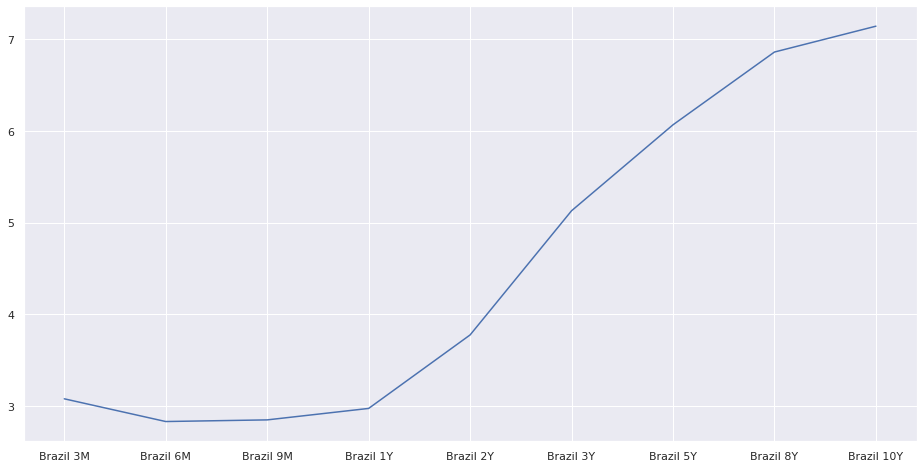

In [0]:
plt.plot(bondsBR , bonds.loc['2020-04-23'].values)

In [0]:
fig = go.Figure()

for i in bonds.index:
  fig.add_trace(go.Scatter(x=bondsBR, y=bonds.loc[i], mode='lines', name=str(i)))

fig.show()

In [0]:
data_inicio = '01/01/2010'
data_fim = '28/04/2020'
bondsMensal = pd.DataFrame()

for prazo in bondsBR:
  bondsMensal[prazo] = inv.get_bond_historical_data(prazo, from_date=data_inicio, to_date=data_fim, interval='Monthly')['Close']


In [0]:
fig = go.Figure()

for i in bondsMensal.index:
  fig.add_trace(
      go.Scatter(
          x=bondsBR, 
          y=bondsMensal.loc[i], 
          mode='lines', 
          name=str(i),
          visible=False
      )
  )

fig.data[0].visible = True

steps = []

for i in range(len(fig.data)):
  step = dict(
      method='restyle',
      args=['visible', [False] * len(fig.data)],
      label=fig.data[i]['name'][:7]
  )
  step['args'][1][i] = True
  steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={'prefix':"Mês: "},
    pad={'t':50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    yaxis = dict(range=[3,14.5])
)

fig.show()

In [0]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [0]:
selic_meta = consulta_bc(432)

In [0]:
s2015 = selic_meta[selic_meta.index.year >= 2015]
b2015 = bonds[bonds.index.year >= 2015]

In [0]:
fig = go.Figure()

for i in bondsBR:
  fig.add_trace(go.Scatter(x=b2015.index, y=b2015[i], mode='lines', name=str(i)))

fig.add_trace(go.Scatter(x=s2015.index, y=s2015['valor'], mode='lines', name='SELIC', line={'color':'black'}))

fig.show()